# 3C. Data Modeling: Clustering
<hr>

We will now assess the results of the zipcode -> neighborhood clustering conversion, running the same models as in ```3A. Data Modeling: Airbnb Listings``` and comparing the results.

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pylab
import scipy.stats as stats
import math
%matplotlib inline

In [0]:
# helper function for plotting residual plots
def plot_residual(ax1, ax2, ax3, y_pred, y_real, line_label, title):
    ax1.scatter(y_pred, 
                y_real, 
                color='blue',
                alpha=0.6,
                label=line_label)
    ax1.set_xlabel('Predicted Y') 
    ax1.set_ylabel('Real Y')
    ax1.legend(loc='best')
    ax1.set_title(title)

    ax2.scatter(y_pred,
                y_real - y_pred, 
                color='green',
                marker='x',
                alpha=0.6,
                label='Residual')
    ax2.set_xlabel('Predicted Y')
    ax2.set_ylabel('Residual')
    
    ax2.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')

    ax2.legend(loc='best')
    ax2.set_title('Residual Plot')
    
    ax3.hist(y_real - y_pred, bins=30, color='green', alpha=0.7)
    ax3.set_title('Histogram of residual values')
    
    return ax1, ax2, ax3

In [0]:
class model:
    
    def __init__(self, model):
        self.model = model
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None
        self.y_pred_train = None
        self.y_pred_test = None
        self.train_score = None
        self.test_score = None
        self.train_score_log = None
        self.test_score_log = None
    
    def data_split(self, x, y, test_size):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=test_size)
    
    def score_reg(self):
        return self.train_score, self.test_score
    
    def score_log(self):
        self.train_score_log = metrics.r2_score(np.exp(self.y_train), np.exp(self.y_pred_train))
        self.test_score_log = metrics.r2_score(np.exp(self.y_test), np.exp(self.y_pred_test))
        return self.train_score_log, self.test_score_log
    
    def data_frame_convert(self):
        df_train = pd.DataFrame({'y_pred': self.y_pred_train, 'y_real': self.y_train})
        df_test = pd.DataFrame({'y_pred_test': self.y_pred_test, 'y_real_test': self.y_test})
        return self.train_score, self.test_score, df_train, df_test

    def data_frame_convert_log(self):
        df_train = pd.DataFrame({'y_pred': np.exp(self.y_pred_train), 'y_real': np.exp(self.y_train)})
        df_test = pd.DataFrame({'y_pred_test': np.exp(self.y_pred_test), 'y_real_test': np.exp(self.y_test)})
        return self.train_score_log, self.test_score_log, df_train, df_test
    
    def fit_model(self, x, y, test_size):
        self.data_split(x, y, test_size)
        self.model = self.model.fit(self.x_train, self.y_train)
        self.train_score = self.model.score(self.x_train, self.y_train)
        self.test_score = self.model.score(self.x_test, self.y_test)
        self.y_pred_train = self.model.predict(self.x_train)
        self.y_pred_test = self.model.predict(self.x_test)
    
def model_iterations(n, x, y, model_arg, log_bool=False):
    new_model = model(model_arg)
    training_scores = [None]*n
    testing_scores = [None]*n

    for i in range(n):
        new_model.fit_model(x, y, 0.3)
        training_scores[i], testing_scores[i] = new_model.score_reg() if not log_bool else new_model.score_log()

    print ('Mean Train Score:', np.mean(training_scores))
    print ('Mean Test Score:', np.mean(testing_scores))
    return new_model

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
sys.path.append('/content/drive/My Drive/Masters Project/datasets/clean_datasets/')

In [0]:
# read in neighborhood dataset
data = pd.read_csv('/content/drive/My Drive/Masters Project/datasets/clean_datasets/listings_neighborhood_clean.csv')

In [0]:
# split into x and y (note that we do not include id and host_id as predictors)
x = data.iloc[:, 2:-2]
y = data.iloc[:, -2]
y_log = data.iloc[:, -1]

## Ridge & Lasso Regression

### Ridge Regression with Untransformed Response

In [0]:
x = x.fillna(method='ffill')

In [13]:
reg_params = 10.**np.linspace(-10, 5, 10)
RidgeCV_model = model_iterations(1, x, y, RidgeCV(alphas=reg_params, fit_intercept=True, cv=5))

Mean Train Score: 0.2678860663803997
Mean Test Score: 0.22197466586640202


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


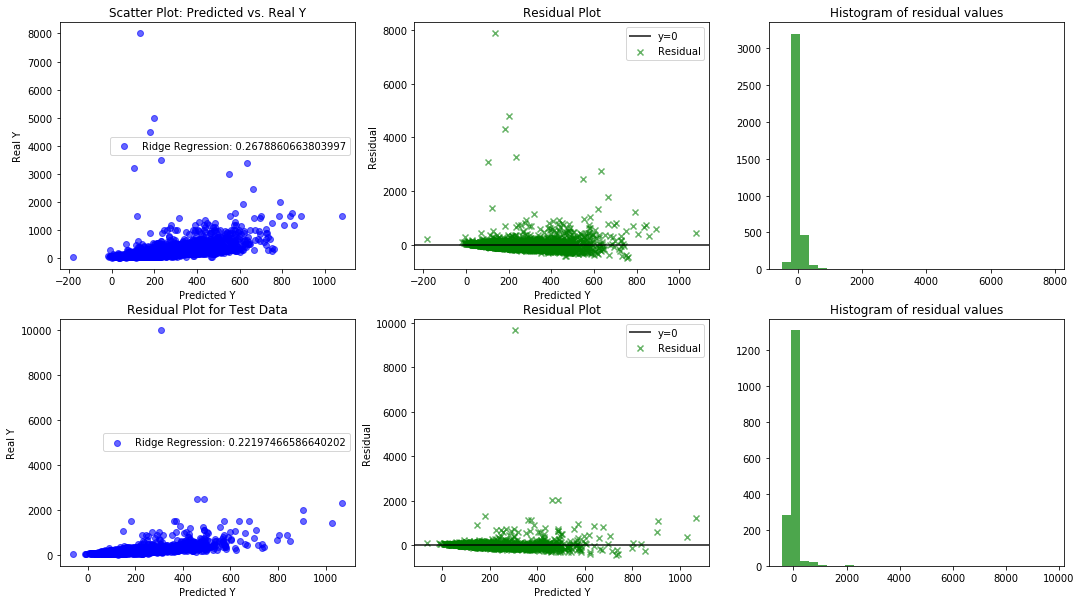

In [14]:
# plot the residuals of a ridge regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ridge_data_vals = RidgeCV_model.data_frame_convert()
plot_residual(axes[0][0], axes[0][1], axes[0][2], ridge_data_vals[2]['y_pred'], ridge_data_vals[2]['y_real'], 'Ridge Regression: {}'.format(ridge_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], ridge_data_vals[3]['y_pred_test'], ridge_data_vals[3]['y_real_test'], 'Ridge Regression: {}'.format(ridge_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

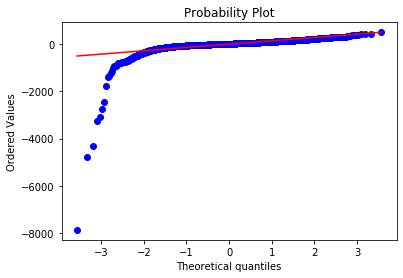

In [15]:
# qq plot for the train residuals
stats.probplot(ridge_data_vals[2]['y_pred'] - ridge_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

### Ridge Regression with Log-Transformed Response

In [16]:
reg_params = 10.**np.linspace(-10, 5, 10)
RidgeCV_model = model_iterations(5, x, y_log, RidgeCV(alphas=reg_params, fit_intercept=True, cv=5), True)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The def

Mean Train Score: 0.2418231949653391
Mean Test Score: 0.31344361062570786


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


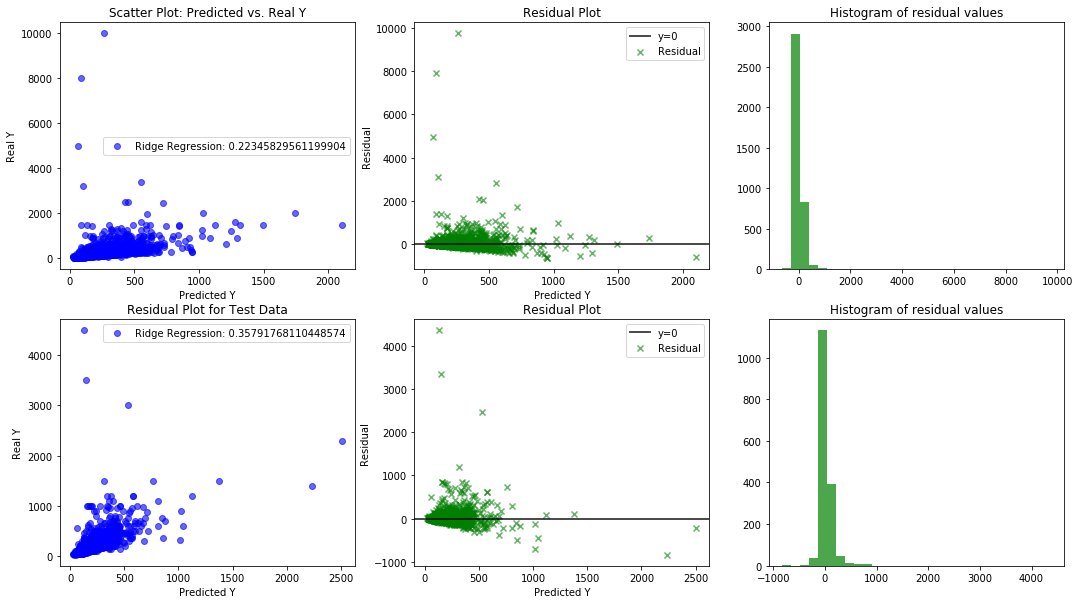

In [17]:
# plot the residuals of a ridge regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ridge_data_vals = RidgeCV_model.data_frame_convert_log()
plot_residual(axes[0][0], axes[0][1], axes[0][2], ridge_data_vals[2]['y_pred'], ridge_data_vals[2]['y_real'], 'Ridge Regression: {}'.format(ridge_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], ridge_data_vals[3]['y_pred_test'], ridge_data_vals[3]['y_real_test'], 'Ridge Regression: {}'.format(ridge_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

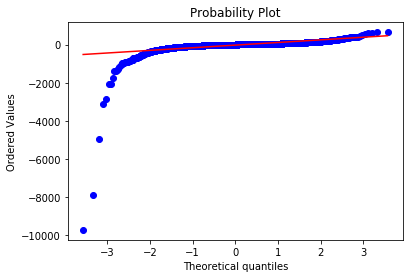

In [18]:
# qq plot for the train residuals
stats.probplot(ridge_data_vals[2]['y_pred'] - ridge_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

### Lasso Regression with Untransformed Response

In [19]:
reg_params = 10.**np.linspace(-10, 5, 10)
LassoCV_model = model_iterations(5, x, y, LassoCV(alphas=reg_params, fit_intercept=True, cv=5))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118420.13639912009, tolerance: 26643.61502212102
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117552.84424492717, tolerance: 26643.61502212102
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117532.65461909771, tolerance: 26643.61502212102
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

Mean Train Score: 0.23334208239449777
Mean Test Score: 0.32175588040477293


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12541503.209034681, tolerance: 24431.376129626024
  tol, rng, random, positive)


### Lasso Regression with Log-Transformed Response

In [20]:
reg_params = 10.**np.linspace(-10, 5, 10)
LassoCV_model = model_iterations(5, x, y_log, LassoCV(alphas=reg_params, fit_intercept=True, cv=5), True)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.353906411025207, tolerance: 0.15601167039624192
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.23255067469182, tolerance: 0.15601167039624192
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.22602604132305, tolerance: 0.15601167039624192
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

Mean Train Score: 0.24479485218698205
Mean Test Score: 0.3231099459886429


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.51983361149314, tolerance: 0.15912264880222107
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.5170380840791, tolerance: 0.15912264880222107
  tol, rng, random, positive)


## Analysis

Overall we see that clustering by neighborhood performs very similarly to the original dataset with zipcodes. We will next try looking at Median Absolute Error.

## Median Absolute Error

In [0]:
def median_absolute_errors(x, y, log_bool=None):
    reg_params = 10.**np.linspace(-10, 5, 10)
    models = [ linear_model.Ridge(), RidgeCV(alphas=reg_params, cv=5), linear_model.Lasso(), LassoCV(alphas=reg_params, cv=5), linear_model.ElasticNet(), linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]
    model_labels = np.array(['Ridge', 'RidgeCV', 'Lasso', 'LassoCV', 'ElasticNet', 'BayesRidge', 'OMP'])
    model_errors = np.array([])

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=15)

    for model in models:
        model.fit(X_train, y_train)
        if not log_bool:
            model_err = metrics.median_absolute_error((y_test), model.predict(X_test))
            model_errors = np.append(model_errors, model_err)
        else:
            model_err = metrics.median_absolute_error(np.exp(y_test), np.exp(model.predict(X_test)))
            model_errors = np.append(model_errors, model_err)
    
    model_position = np.arange(model_errors.shape[0])
    models_sorted = np.argsort(model_errors)
    for i, model in enumerate(model_labels):
        print ('Model {} Results: {}'.format(model_labels[i], model_errors[i]))

    plt.figure(figsize=(10,8))
    plt.bar(model_position, model_errors[models_sorted], align='center')
    plt.xticks(model_position, model_labels[models_sorted])
    plt.xlabel('Estimator')
    plt.ylabel('Median Absolute Error')
    plt.show()

### Median Absolute Error Untransformed Response


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57611975.523203164, tolerance: 31784.13313566924
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57549769.46568169, tolerance: 31784.13313566924
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57548516.51172669, tolerance: 31784.13313566924
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase 

Model Ridge Results: 54.46739342412325
Model RidgeCV Results: 53.898766851064806
Model Lasso Results: 53.82661590060333
Model LassoCV Results: 54.7588797968174
Model ElasticNet Results: 58.21042229379236
Model BayesRidge Results: 53.20312350585601
Model OMP Results: 61.198573533050876


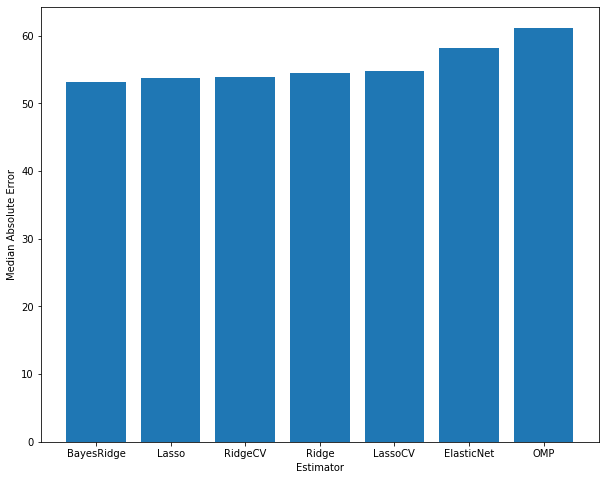

In [23]:
median_absolute_errors(x, y)

### Median Absolute Error Log-Transformed Response

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.271770025166802, tolerance: 0.14870429539711888
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.6606109777814595, tolerance: 0.14870429539711888
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.659604540876444, tolerance: 0.14870429539711888
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

Model Ridge Results: 35.8564297182548
Model RidgeCV Results: 35.8564297182548
Model Lasso Results: 69.81610667922422
Model LassoCV Results: 36.695017872997084
Model ElasticNet Results: 69.81610667922422
Model BayesRidge Results: 36.20126349427108
Model OMP Results: 40.18643995661563


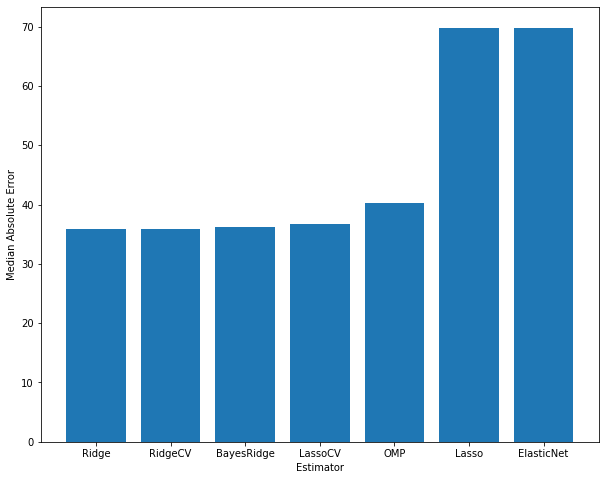

In [24]:
median_absolute_errors(x, y_log, True)

## Single Listing House Data

In [0]:
data_single = data[data['beds'] == min(data['beds'])]

# split into x_1 and y_1 (note that we do not include id and host_id as predictors)
x_1 = data_single.iloc[:, 2:-2]
y_1 = data_single.iloc[:, -2]
y_1_log = data_single.iloc[:, -1]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316084.96071106195, tolerance: 9870.786630099008
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315899.3692423105, tolerance: 9870.786630099008
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315890.4019729793, tolerance: 9870.786630099008
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase 

Model Ridge Results: 34.12480774860792
Model RidgeCV Results: 33.98404615482126
Model Lasso Results: 35.447387127123974
Model LassoCV Results: 35.447387127123974
Model ElasticNet Results: 40.6341930499066
Model BayesRidge Results: 36.47227229381532
Model OMP Results: 37.32636506925168


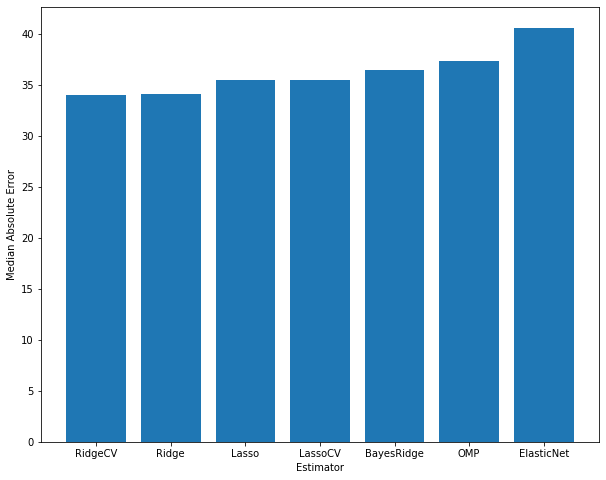

In [26]:
median_absolute_errors(x_1, y_1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.810058356477995, tolerance: 0.04492662767137335
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.50540567828672, tolerance: 0.04492662767137335
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.49780463514159, tolerance: 0.04492662767137335
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

Model Ridge Results: 27.612514374466464
Model RidgeCV Results: 27.612514374466464
Model Lasso Results: 37.50000000000003
Model LassoCV Results: 27.139154092090834
Model ElasticNet Results: 37.50000000000003
Model BayesRidge Results: 27.470247101679966
Model OMP Results: 29.62308921382936


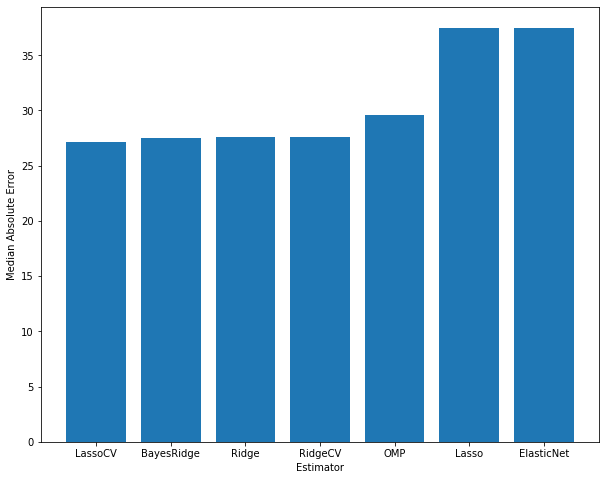

In [27]:
median_absolute_errors(x_1, y_1_log, True)